# Importing Necessary Libraries

In [303]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import math 
import sklearn
import matplotlib.dates as mdates

pd.options.mode.chained_assignment = None
%matplotlib inline

# Imorting Data

In [304]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")
train.shape,test.shape

((33750, 15), (14454, 14))

In [305]:
data = train.append(test, ignore_index=True,sort=True)

# Data Preprocessing and Feature Engineering

In [306]:
data['date_time'] = pd.to_datetime(data.date_time,format='%Y-%m-%d %H:%M:%S')
data['year']=data['date_time'].dt.year
data['month']=data['date_time'].dt.month
data['week']=data['date_time'].dt.week
data['day']=data['date_time'].dt.day
data['hour']=data['date_time'].dt.hour
data['quarter']=data['date_time'].dt.quarter
data['dayofweek']=data['date_time'].dt.dayofweek
data['dayofyear']=data['date_time'].dt.dayofyear
# data['is_month_end']=data['date_time'].dt.is_month_end
# data['is_month_start']=data['date_time'].dt.is_month_start
#data['is_quarter_end']=data['date_time'].dt.is_quarter_end
# data['is_quarter_start']=data['date_time'].dt.is_quarter_start
# data['is_year_end']=data['date_time'].dt.is_year_end
# data['is_year_start']=data['date_time'].dt.is_year_start
# data['weekday_name']=data['date_time'].dt.weekday_name
# data['is_weekend'] = np.where(data['weekday_name'].isin(['Sunday','Saturday']),1,0)
# del data['weekday_name']
del data['date_time']
# data.is_month_end = data.is_month_end.astype(int)
# data.is_month_start = data.is_month_start.astype(int)
#data.is_quarter_end = data.is_quarter_end.astype(int)
# data.is_quarter_start = data.is_quarter_start.astype(int)
# data.is_year_end = data.is_year_end.astype(int)
# data.is_year_start = data.is_year_start.astype(int)

In [307]:
# data['is_holiday'][data['is_holiday'].isin(['None'])]=1
# data['is_holiday'][data['is_holiday'].isin(['Labor Day','New Years Day','Thanksgiving Day','Martin Luther King Jr Day','Christmas Day','State Fair','Independence Day','Washingtons Birthday','Columbus Day','Veterans Day','Memorial Day'])]=0
# data.is_holiday = data.is_holiday.astype(int)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 22 columns):
air_pollution_index    48204 non-null int64
clouds_all             48204 non-null int64
dew_point              48204 non-null int64
humidity               48204 non-null int64
is_holiday             48204 non-null object
rain_p_h               48204 non-null float64
snow_p_h               48204 non-null float64
temperature            48204 non-null float64
traffic_volume         33750 non-null float64
visibility_in_miles    48204 non-null int64
weather_description    48204 non-null object
weather_type           48204 non-null object
wind_direction         48204 non-null int64
wind_speed             48204 non-null int64
year                   48204 non-null int64
month                  48204 non-null int64
week                   48204 non-null int64
day                    48204 non-null int64
hour                   48204 non-null int64
quarter                48204 non-null int64


In [309]:
data = pd.get_dummies(data, columns=['weather_type'],drop_first=True)
#dummy variable trap
del data['is_holiday']
#data = pd.get_dummies(data, columns=['weather_description'],drop_first=True)
# data = pd.get_dummies(data, columns=['is_holiday'])
# data=data.drop(['is_holiday_Labor Day'],axis=1) #dummy variable trap
# del data['air_pollution_index']
# del data['dew_point']
# del data['visibility_in_miles']
# del data['humidity']
# del data['wind_direction']
# del data['wind_speed']

In [310]:
#label encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_variables = data.dtypes.loc[data.dtypes=='object'].index
le = LabelEncoder()

for var in categorical_variables:
    data[var] = data[var].astype(str)
    
for var in categorical_variables:
    data[var] = le.fit_transform(data[var])

In [311]:
train1=data[~data['traffic_volume'].isnull()]
train_x=data[~data['traffic_volume'].isnull()]
train_y=train1['traffic_volume']
test1=data[data['traffic_volume'].isnull()]
test_x=data[data['traffic_volume'].isnull()]

del train_x['traffic_volume']
del test_x['traffic_volume']

In [312]:
plotdata=data[~data['traffic_volume'].isnull()]
del plotdata['traffic_volume']

In [313]:
del data['dew_point']
del data['quarter']
del data['dayofyear']

In [314]:
data

,air_pollution_index,clouds_all,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,weather_description,wind_direction,...,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm
0,121,40,89,0.00,0.0,288.28,5545.0,1,24,329,...,1,0,0,0,0,0,0,0,0,0
1,178,75,67,0.00,0.0,289.36,4516.0,1,2,330,...,1,0,0,0,0,0,0,0,0,0
2,113,90,66,0.00,0.0,289.58,4767.0,2,19,329,...,1,0,0,0,0,0,0,0,0,0
3,20,90,66,0.00,0.0,290.13,5026.0,5,19,329,...,1,0,0,0,0,0,0,0,0,0
4,281,75,65,0.00,0.0,291.14,4918.0,7,2,329,...,1,0,0,0,0,0,0,0,0,0
5,23,1,65,0.00,0.0,291.72,5181.0,6,27,328,...,0,0,0,0,0,0,0,0,0,0
6,184,1,64,0.00,0.0,293.17,5584.0,7,27,328,...,0,0,0,0,0,0,0,0,0,0
7,167,1,64,0.00,0.0,293.86,6015.0,7,27,327,...,0,0,0,0,0,0,0,0,0,0
8,119,20,63,0.00,0.0,294.14,5791.0,6,4,327,...,1,0,0,0,0,0,0,0,0,0
9,161,20,63,0.00,0.0,293.10,4770.0,3,4,326,...,1,0,0,0,0,0,0,0,0,0


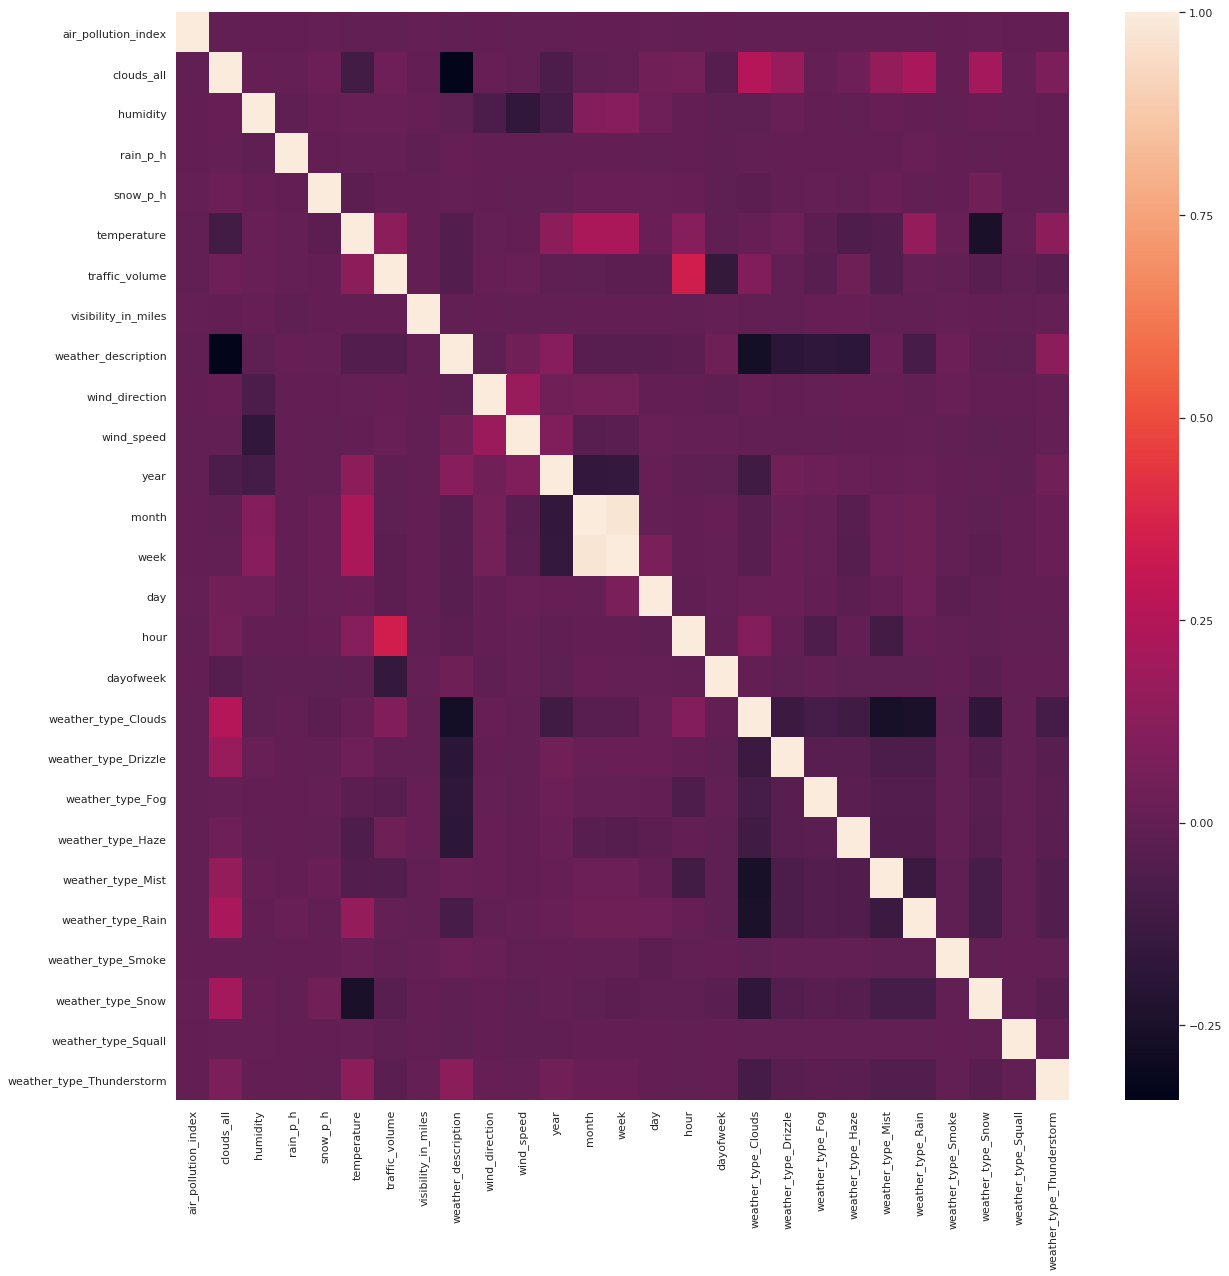

In [315]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr)

In [316]:
# from sklearn.preprocessing import MinMaxScaler
# sc_X = MinMaxScaler()
# train_x = sc_X.fit_transform(train_x)
# test_x = sc_X.transform(test_x)

# Tpot Model Selection

In [288]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics
import timeit

In [289]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = .20, random_state = 33)

In [34]:
# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                      random_state=25, 
                      n_jobs=-1, 
                      scoring='neg_mean_squared_error',
                      generations=20, 
                      population_size=100,
                      early_stop = 5,
                      memory = None)
times = []
scores = []
winning_pipes = []
# run 1 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_SANGAM_datathon_2.py')
# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

29 operators have been imported by TPOT.


Skipped pipeline #47 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['air_pollution_index', 'clouds_all', 'dew_point', 'humidity', 'rain_p_h', 'snow_p_h', 'temperature', 'visibility_in_miles', 'weather_description', 'wind_direction', 'wind_speed', 'year', 'month', 'week', 'day', 'hour', 'quarter', 'dayofweek', 'dayofyear', 'weather_type_Clear', 'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog', 'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain', 'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Thunderstorm'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28']
expected quarter, dayofweek, weather_type_Clear, week, snow_p_

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 2 is required by FeatureAgglomeration..
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=4 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=5 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is require

Skipped pipeline #223 due to time out. Continuing to the next pipeline.
Skipped pipeline #230 due to time out. Continuing to the next pipeline.
Skipped pipeline #247 due to time out. Continuing to the next pipeline.
Skipped pipeline #257 due to time out. Continuing to the next pipeline.
Skipped pipeline #280 due to time out. Continuing to the next pipeline.
Generation 2 - Current Pareto front scores:
-1	-107541.34901221725	XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.45)
-2	-106228.31805747331	XGBRegressor(MaxAbsScaler(input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=18, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.9000000000000001)

_pre_test decorator:

Skipped pipeline #326 due to time out. Continuing to the next pipeline.
Skipped pipeline #335 due to time out. Continuing to the next pipeline.
Skipped pipeline #396 due to time out. Continuing to the next pipeline.
Generation 3 - Current Pareto front scores:
-1	-107541.34901221725	XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.45)
-2	-103370.49267305381	XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=0.01), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.6000000000000001)

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an in

# pipeline 1

In [216]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 33)

In [217]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.8500000000000001, tol=0.01)),
    XGBRegressor(learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=0.6000000000000001)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [218]:
results = np.clip(results, train['traffic_volume'].min(), train['traffic_volume'].max()+1000)
from sklearn.metrics import mean_squared_log_error
print(100-np.sqrt(mean_squared_log_error(results,y_valid)))

99.71449300884736


In [154]:
exported_pipeline.fit(train_x, train_y)
pred=exported_pipeline.predict(test_x)
pred=np.clip(pred, train['traffic_volume'].min(), train['traffic_volume'].max()+2000)
final=pd.DataFrame()
final['date_time'] = test['date_time']
final['traffic_volume'] =pred
final.to_csv('Krishna_181295_prediction_pipeline2.csv', index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


# Wining Pipeline

In [317]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 33)

In [318]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75, learning_rate=0.01, loss="ls", max_depth=6, max_features=0.9500000000000001, min_samples_leaf=4, min_samples_split=20, n_estimators=100, subsample=0.35000000000000003,random_state=27)),
    XGBRegressor(learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=1.0,random_state=27)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [319]:
results = np.clip(results, train['traffic_volume'].min(), train['traffic_volume'].max()+1000)
from sklearn.metrics import mean_squared_log_error
print(100-np.sqrt(mean_squared_log_error(results,y_valid)))

99.73572590575948


In [320]:
exported_pipeline.fit(train_x, train_y)
pred=exported_pipeline.predict(test_x)
pred=np.clip(pred, train['traffic_volume'].min(), train['traffic_volume'].max()+2000)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [321]:
final=pd.DataFrame()
final['date_time'] = test['date_time']
final['traffic_volume'] =pred
final.to_csv('Krishna_181295_prediction_pipeline2.csv', index=False)

# Manual Model Selection

# XGBRegressor

In [223]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 33)

In [224]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

modelxgb = XGBRegressor(random_state=0,
                         base_score=0.5,
                         booster = "gbtree",
                         colsample_bytree = 1,
                         colsample_bynode=1,
                         colsample_bylevel=1,
                         gamma=0,
                         importance_type='gain',
                         learning_rate=0.1,
                         max_delta_step=0,
                         max_depth = 9,
                         min_child_weight=2,
                         missing=None,
                         n_estimators=1100,
                         n_jobs=-1, 
                         nthread=-1,
                         objective= "reg:squarederror",
                         reg_lambda= 1,
                         reg_alpha=0,
                         scale_pos_weight=1,
                         seed= None,
                         silent=None,
                         subsample=0.8500000000000001,
                         verbosity=3,
                         early_stopping_rounds=10
                        )
modelxgb.fit(X_train , y_train)
# pred = model.predict_proba(X_valid)
predxgb = modelxgb.predict(X_valid)
predxgb1=modelxgb.predict(test_x)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predxgb,y_valid))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 524 extra nodes, 0 pruned nodes, max_depth=9
[17:07:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 e

[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 538 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[17:07:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 736 e

[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[17:07:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 e

[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 606 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 642 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 528 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 0 pruned nodes, max_depth=9
[17:07:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 312 e

[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 544 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=9
[17:07:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 e

[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=9
[17:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 528 e

[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=9
[17:08:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 614 e

[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 512 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 644 extra nodes, 0 pruned nodes, max_depth=9
[17:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 708 e

[17:08:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=9
[17:08:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=9
[17:08:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 0 pruned nodes, max_depth=9
[17:08:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 0 pruned nodes, max_depth=9
[17:08:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=9
[17:08:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 606 extra nodes, 0 pruned nodes, max_depth=9
[17:08:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 642 extra nodes, 0 pruned nodes, max_depth=9
[17:08:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 e

[17:08:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 0 pruned nodes, max_depth=9
[17:08:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[17:08:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=9
[17:08:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 0 pruned nodes, max_depth=9
[17:08:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=9
[17:08:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[17:08:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[17:08:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 684 e

[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=9
[17:08:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[17:08:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 e

[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[17:08:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 e

[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 532 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[17:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=9
[17:08:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 e

[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 562 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[17:08:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 598 e

[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 594 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=9
[17:08:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 748 e

[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=9
[17:08:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 618 e

[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[17:08:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 470 e

270.3794339838896

In [225]:
predxgb = np.clip(predxgb, train['traffic_volume'].min(), train['traffic_volume'].max())
from sklearn.metrics import mean_squared_log_error
print(100-np.sqrt(mean_squared_log_error(predxgb,y_valid)))

99.73944408080168


In [226]:
final=pd.DataFrame()
final['date_time'] = test['date_time']
final['traffic_volume'] =predxgb1
final.to_csv('krishna_priya_181295_prediction_xgb.csv', index=False)

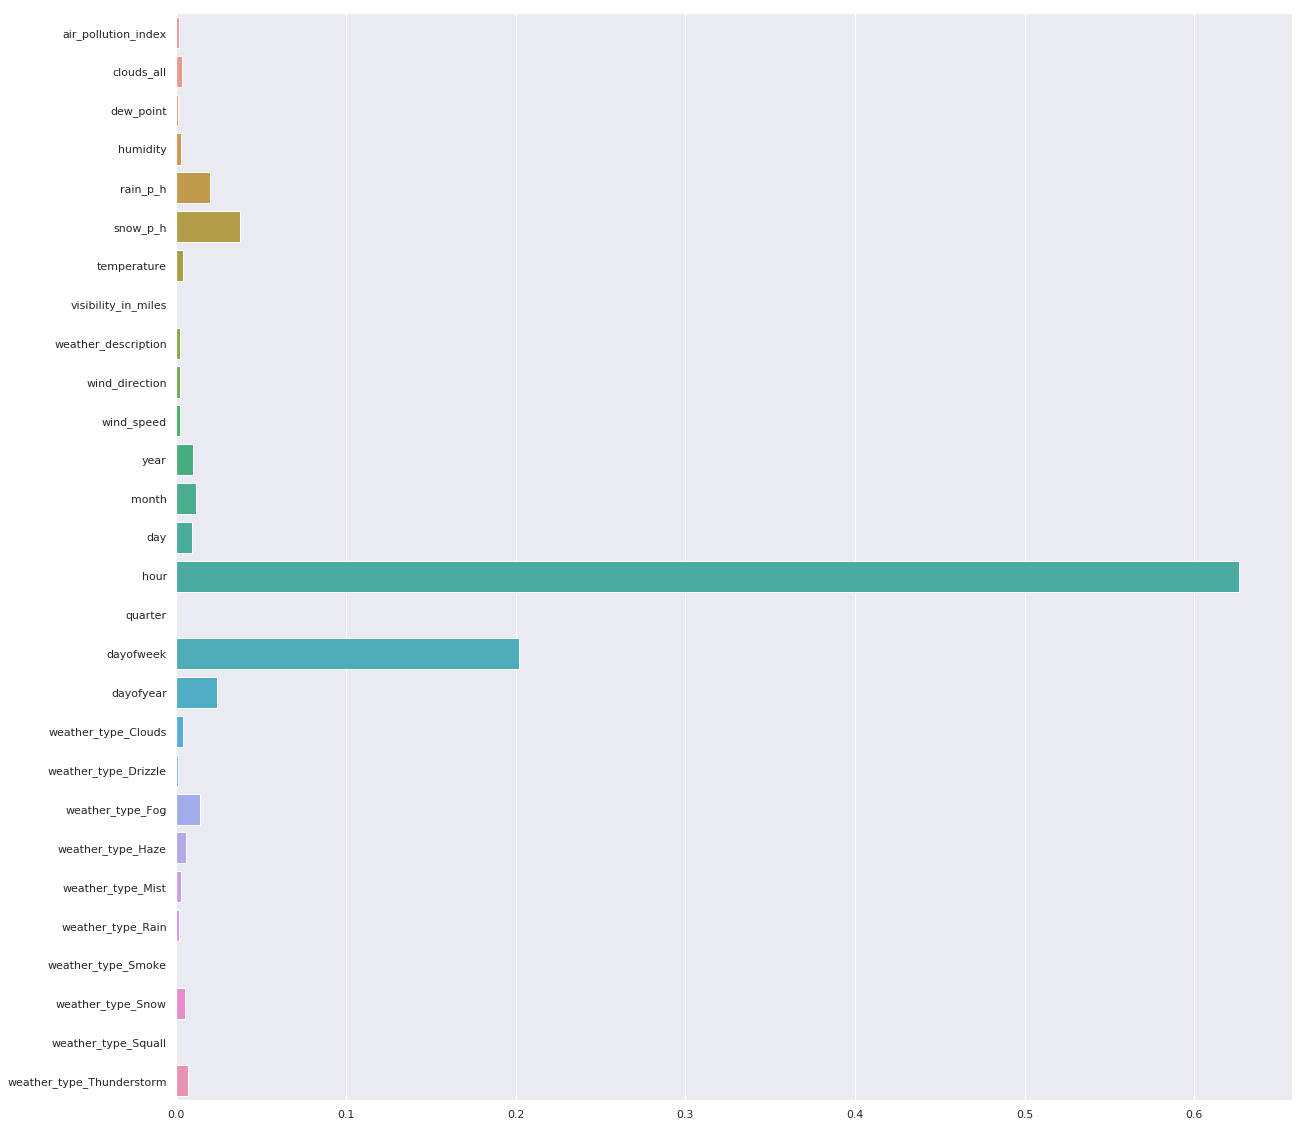

In [227]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.barplot(modelxgb.feature_importances_, plotdata.columns)

# Best Performing Model : Stacked GBoost and XGBoost